* Öncelikle, Sıcaklık verilerini Kaggle'dan indirin.
* Önceki derste olduğu gibi, hedef değişkeninizin görünür sıcaklık ve sıcaklık arasındaki fark olduğu bir doğrusal regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem ve rüzgar hızı kullanın. Şimdi, modelinizi OLS kullanarak tahmin edin. R-kare ve ayarlanmış R-kare değerleri nelerdir? Tatminkar olduklarını düşünüyor musunuz? Açıklayın.
* Daha sonra, yukarıdaki modele nem ve rüzgar hızı etkileşimini dahil edin ve OLS'yi kullanarak modeli tahmin edin. Şimdi, bu modelin R-kare değeri nedir? Bu model bir öncekine göre gelişti mi?
* İlk modele ek açıklayıcı değişken olarak görünürlük ekleyin ve tahmin edin. R-kare arttı mı? Ayarlanmış R-kare değeri ne oldu? Tabloda ortaya çıkan farklılıkları, ayarlanmış R-kare içindeki iyileşme açısından etkileşim terimi ve görünürlük ile karşılaştırın. Hangisi daha kullanışlı?
* AIC ve BIC puanlarına göre yukarıdaki üç modelden en iyisini seçin. Mentor ile gerekçenizi tartışarak seçiminizi doğrulayın.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
weather = pd.read_csv('./datasets/weatherHistory.csv')
weather.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [3]:
weather['Temperature_Diff (C)'] = weather['Temperature (C)'] - weather['Apparent Temperature (C)']

In [4]:
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Temperature_Diff (C)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2.083333
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2.127778
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,0.000000
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2.344444
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,1.777778


In [5]:
weather.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
Temperature_Diff (C)          0
dtype: int64

In [6]:
weather.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Loud Cover,96453.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000
Temperature_Diff (C),96453.0,1.077650,1.678694,-4.811111,0.000000,0.0000,2.216667,10.183333


In [7]:
Y = weather['Temperature_Diff (C)']
X = weather[['Humidity','Wind Speed (km/h)']]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [3.02918594 0.11929075]
Sabit değer (bias): 
 -2.438105415187706


In [8]:
import statsmodels.api as sm
Y = weather['Temperature_Diff (C)']
X = weather[['Humidity','Wind Speed (km/h)']]

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Temperature_Diff (C)   R-squared:                       0.288
Model:                              OLS   Adj. R-squared:                  0.288
Method:                   Least Squares   F-statistic:                 1.949e+04
Date:                  Tue, 31 Dec 2019   Prob (F-statistic):               0.00
Time:                          10:59:58   Log-Likelihood:            -1.7046e+05
No. Observations:                 96453   AIC:                         3.409e+05
Df Residuals:                     96450   BIC:                         3.409e+05
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4381      0.021   -115.948      0.000      -2.479      -2.397
Humidity              3.0292      0.024    126.479      0.000       2.982       3.076
Wind Speed (km/h)     0.1193      0.001    176.164      0.000       0.118       0.121
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-kare ve ayarlanmış R-kare değerleri nelerdir? Tatminkar olduklarını düşünüyor musunuz? Açıklayın:**

R-kare ve ayarlanmış R-kare değerleri 0.288 olarak görünüyor. Değer düşüktür. Modelimizin sonuç hakkında çok fazla bilgi vermediğini gösterir, bu da çok iyi tahminler vermeyeceği anlamına gelir

In [9]:
weather['Humidity_WindSpeed'] = weather['Humidity'] * weather['Wind Speed (km/h)']

Y = weather['Temperature_Diff (C)']
X = weather[['Humidity','Wind Speed (km/h)','Humidity_WindSpeed']]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-0.17751219 -0.09048213  0.29711946]
Sabit değer (bias): 
 -0.08393631009786029


In [10]:
import statsmodels.api as sm
Y = weather['Temperature_Diff (C)']
X = weather[['Humidity','Wind Speed (km/h)','Humidity_WindSpeed']]

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Temperature_Diff (C)   R-squared:                       0.341
Model:                              OLS   Adj. R-squared:                  0.341
Method:                   Least Squares   F-statistic:                 1.666e+04
Date:                  Tue, 31 Dec 2019   Prob (F-statistic):               0.00
Time:                          11:00:02   Log-Likelihood:            -1.6669e+05
No. Observations:                 96453   AIC:                         3.334e+05
Df Residuals:                     96449   BIC:                         3.334e+05
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0839      0.033     -2.511      0.012      -0.149      -0.018
Humidity              -0.1775      0.043     -4.133      0.000      -0.262      -0.093
Wind Speed (km/h)     -0.0905      0.002    -36.797      0.000      -0.095      -0.086
Humidity_WindSpeed     0.2971      0.003     88.470      0.000       0.291       0.304
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Daha sonra, yukarıdaki modele nem ve rüzgar hızı etkileşimini dahil edin ve OLS'yi kullanarak modeli tahmin edin. Şimdi, bu modelin R-kare değeri nedir? Bu model bir öncekine göre gelişti mi?**

Modelin R-kare değeri 0.341 değerine ulaştı. Önceki modele göre daha iyi tahmin yapabileceğini gösteriyor.

**İlk modele ek açıklayıcı değişken olarak görünürlük ekleyin ve tahmin edin.**

In [11]:
weather = pd.read_csv('./datasets/weatherHistory.csv')
weather.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [12]:
weather['Temperature_Diff (C)'] = weather['Temperature (C)'] - weather['Apparent Temperature (C)']

In [13]:
Y = weather['Temperature_Diff (C)']
X = weather[['Humidity','Wind Speed (km/h)','Visibility (km)']]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [ 2.60664109  0.11990113 -0.05398318]
Sabit değer (bias): 
 -1.5755946860023413


In [16]:
import statsmodels.api as sm
Y = weather['Temperature_Diff (C)']
X = weather[['Humidity','Wind Speed (km/h)','Visibility (km)']]

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Temperature_Diff (C)   R-squared:                       0.304
Model:                              OLS   Adj. R-squared:                  0.303
Method:                   Least Squares   F-statistic:                 1.401e+04
Date:                  Tue, 31 Dec 2019   Prob (F-statistic):               0.00
Time:                          11:21:54   Log-Likelihood:            -1.6938e+05
No. Observations:                 96453   AIC:                         3.388e+05
Df Residuals:                     96449   BIC:                         3.388e+05
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.5756      0.028    -56.605      0.000      -1.630      -1.521
Humidity              2.6066      0.025    102.784      0.000       2.557       2.656
Wind Speed (km/h)     0.1199      0.001    179.014      0.000       0.119       0.121
Visibility (km)      -0.0540      0.001    -46.614      0.000      -0.056      -0.052
==============================================================================
Omnibus:                     3833.895   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4584.022
Skew:                           0.459   Prob(JB):                         0.00
Kurtosis:                       3.545   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-kare arttı mı? Ayarlanmış R-kare değeri ne oldu? Tabloda ortaya çıkan farklılıkları, ayarlanmış R-kare içindeki iyileşme açısından etkileşim terimi ve görünürlük ile karşılaştırın. Hangisi daha kullanışlı?**

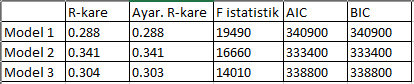


Oluşturduğumuz modelleri incelediğimizde Model 1'e eklediğimiz görünürlük (Visibility (km)) değişkeni Model 3 te R-kare açısından artış sağlayıp daha kullanışlı bir model oluşturmamızı sağladı. Model 2 de eklediğimiz Nem * Rüzgar Hızı etkileşim terimi Model 2 'nin diğer modellerden daha iyi bir R-kare değeri elde etmemizi sağlamış oldu.

**AIC ve BIC puanlarına göre yukarıdaki üç modelden en iyisini seçin. Mentor ile gerekçenizi tartışarak seçiminizi doğrulayın**

AIC ve BIC karşılaştırmasında Model 2'nin diğer modellerden daha düşül değerde olduğu görülüyor. Daha düşük değerde olması Model 2 nin daha iyi model olduğunu gösteriyor. Hem R-kare ve ayarlanmış R-kare değerleri hem de AIC ve BIC testleri Model 2 nin daha avantajlı olduğunu göstiyor. Model 2 oluşturan parameterler Model 1 'i oluşturan parametreleri de içerdiği için F-testini de kullanabiliriz. Model 1 ve Model 2 yi karşılaştırdığımızda Model 1 F-testi açısından daha avantajlı görünüyor. 